In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


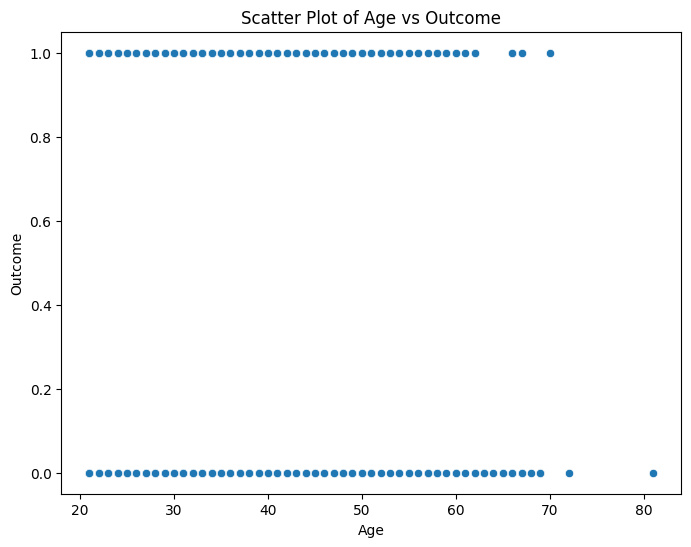

<Figure size 1000x800 with 0 Axes>

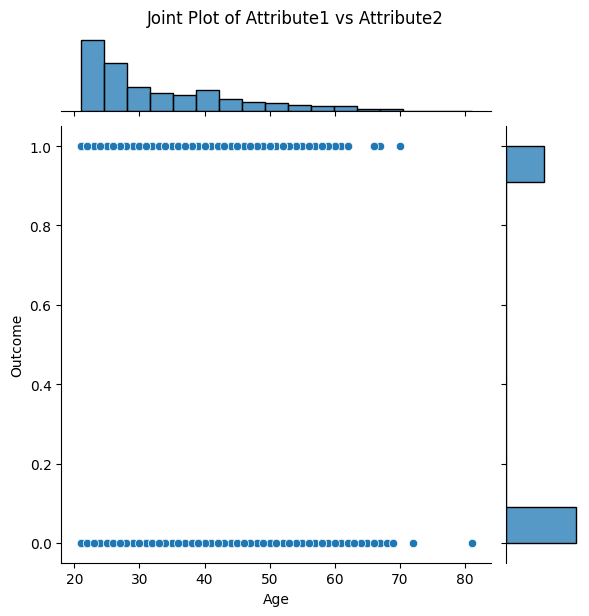

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'attribute1' and 'attribute2'
# Replace 'attribute1' and 'attribute2' with your actual column names

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Outcome', data=dataset)
plt.title('Scatter Plot of Age vs Outcome')
plt.show()

# Joint Plot
plt.figure(figsize=(10, 8))
sns.jointplot(x='Age', y='Outcome', data=dataset, kind='scatter')
plt.suptitle('Joint Plot of Attribute1 vs Attribute2', y=1.02)
plt.show()


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    object 
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:

dataset.fillna(dataset.mean(), inplace=True)

<Axes: xlabel='Outcome', ylabel='count'>

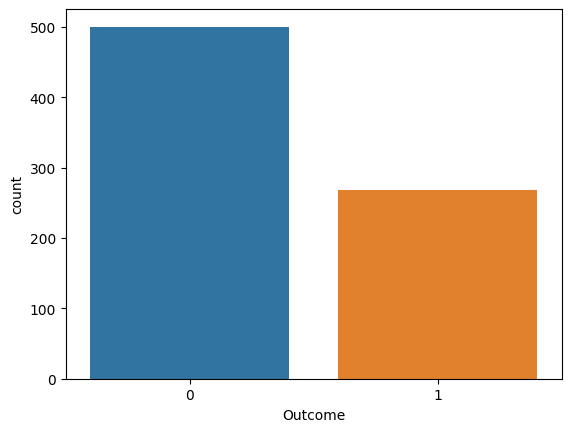

In [ ]:
y=dataset["Outcome"]
sns.countplot(data=dataset,x="Outcome")

In [ ]:
print(dataset.corr()["Outcome"].abs().sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [ ]:
dataset["Outcome"].unique()

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("Outcome",axis=1)
target = dataset["Outcome"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape


(614, 8)

In [ ]:
Y_train.shape

(614,)

In [ ]:
X_test.shape

(154, 8)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

# Handle missing values (fill with mean, median, or mode)
df.fillna(df.mean(), inplace=True)

# Handle categorical variables (label encoding for simplicity)
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Split the data into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Replace 'target_column' with your actual target column name
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Make predictions
Y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 74.68 %


F1 Score: 0.65
Precision: 0.64
Recall: 0.67


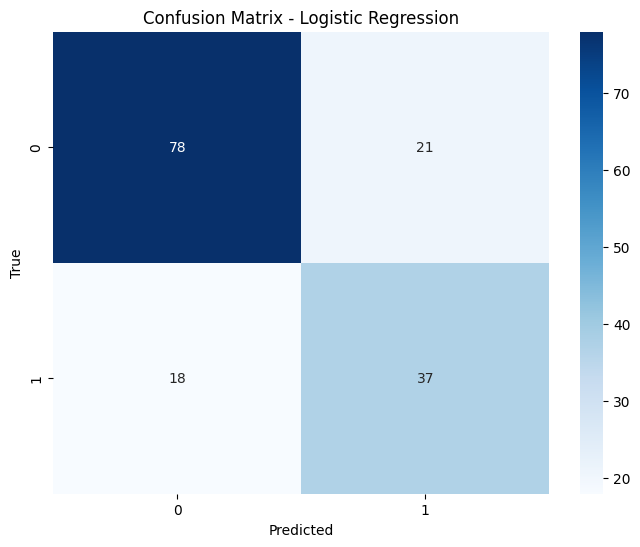

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# F1 Score
f1_lr = f1_score(Y_test, Y_pred_lr)
print("F1 Score: {:.2f}".format(f1_lr))

# Precision
precision_lr = precision_score(Y_test, Y_pred_lr)
print("Precision: {:.2f}".format(precision_lr))

# Recall
recall_lr = recall_score(Y_test, Y_pred_lr)
print("Recall: {:.2f}".format(recall_lr))

# Confusion Matrix
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
Y_pred_lr.shape

(154,)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(154,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 73.38 %


In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='poly')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 76.62 %


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming X_train, Y_train, X_test, and Y_test are defined

# Create the SVM model
sv = svm.SVC(kernel='poly')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(sv, X_train, Y_train, cv=5)

# Fit the model on the training data
sv.fit(X_train, Y_train)

# Predict on the test set
Y_pred_svm = sv.predict(X_test)

# Calculate accuracy on the test set
score_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)

# Calculate mean cross-validation score
mean_cv_score = round(cv_scores.mean() * 100, 2)

print("The accuracy score achieved using Linear SVM is: " + str(score_svm) + " %")
print("The mean cross-validation score is: " + str(mean_cv_score) + " %")


The accuracy score achieved using Linear SVM is: 76.62 %
The mean cross-validation score is: 75.89 %


F1 Score: 0.64
Precision: 0.71
Recall: 0.58


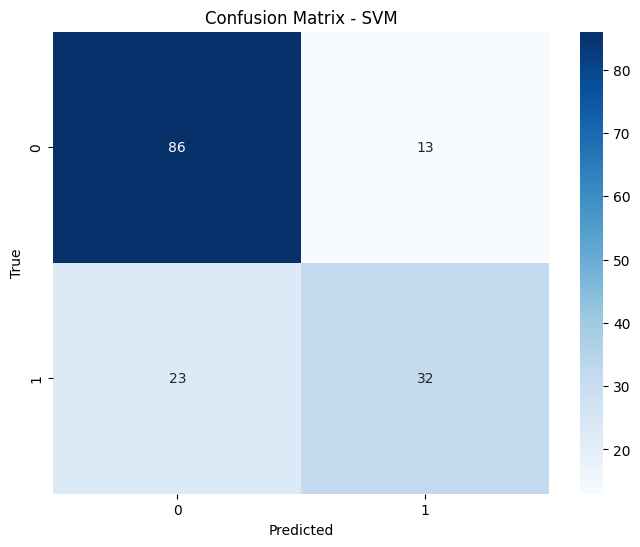

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using SVM
Y_pred_svm = sv.predict(X_test)

# F1 Score
f1_svm = f1_score(Y_test, Y_pred_svm)
print("F1 Score: {:.2f}".format(f1_svm))

# Precision
precision_svm = precision_score(Y_test, Y_pred_svm)
print("Precision: {:.2f}".format(precision_svm))

# Recall
recall_svm = recall_score(Y_test, Y_pred_svm)
print("Recall: {:.2f}".format(recall_svm))

# Confusion Matrix
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 76.62 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 70.78 %
The accuracy score achieved using KNN is: 70.78 %


F1 Score: 0.59
Precision: 0.59
Recall: 0.58


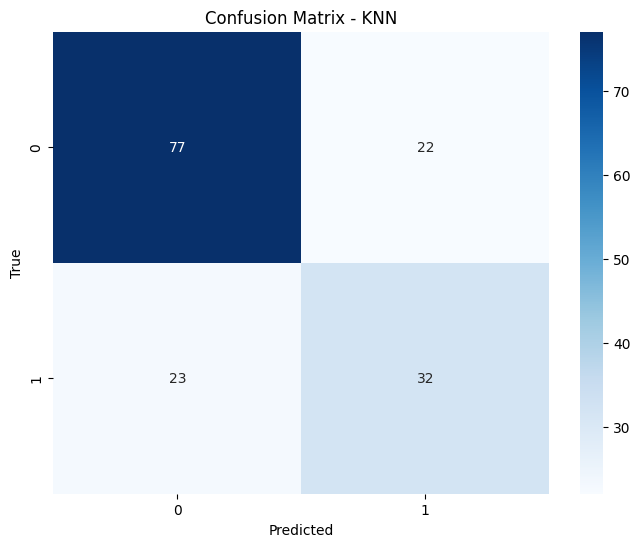

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using KNN
Y_pred_knn = knn.predict(X_test)

# F1 Score
f1_knn = f1_score(Y_test, Y_pred_knn)
print("F1 Score: {:.2f}".format(f1_knn))

# Precision
precision_knn = precision_score(Y_test, Y_pred_knn)
print("Precision: {:.2f}".format(precision_knn))

# Recall
recall_knn = recall_score(Y_test, Y_pred_knn)
print("Recall: {:.2f}".format(recall_knn))

# Confusion Matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(1500):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 79.87 %
The accuracy score achieved using Decision Tree is: 79.87 %


F1 Score: 0.72
Precision: 0.69
Recall: 0.75


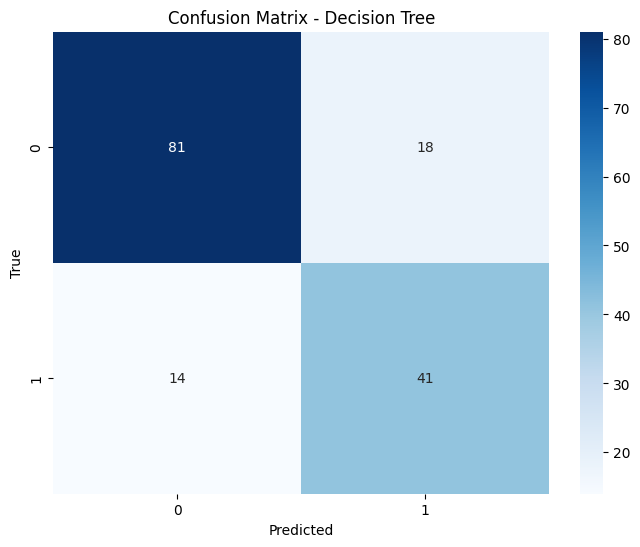

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using Decision Tree
Y_pred_dt = dt.predict(X_test)

# F1 Score
f1_dt = f1_score(Y_test, Y_pred_dt)
print("F1 Score: {:.2f}".format(f1_dt))

# Precision
precision_dt = precision_score(Y_test, Y_pred_dt)
print("Precision: {:.2f}".format(precision_dt))

# Recall
recall_dt = recall_score(Y_test, Y_pred_dt)
print("Recall: {:.2f}".format(recall_dt))

# Confusion Matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using Random  Forst is: "+str(score_rf)+" %")

The accuracy score achieved using Random  Forst is: 75.97 %


F1 Score: 0.67
Precision: 0.66
Recall: 0.67


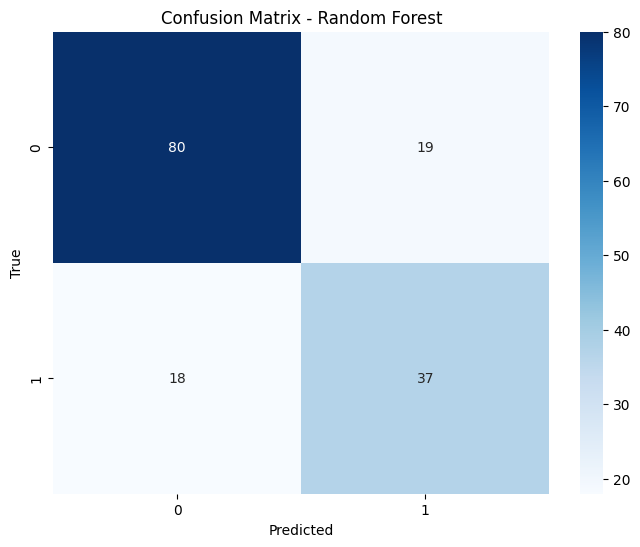

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using Random Forest
Y_pred_rf = rf.predict(X_test)

# F1 Score
f1_rf = f1_score(Y_test, Y_pred_rf)
print("F1 Score: {:.2f}".format(f1_rf))

# Precision
precision_rf = precision_score(Y_test, Y_pred_rf)
print("Precision: {:.2f}".format(precision_rf))

# Recall
recall_rf = recall_score(Y_test, Y_pred_rf)
print("Recall: {:.2f}".format(recall_rf))

# Confusion Matrix
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


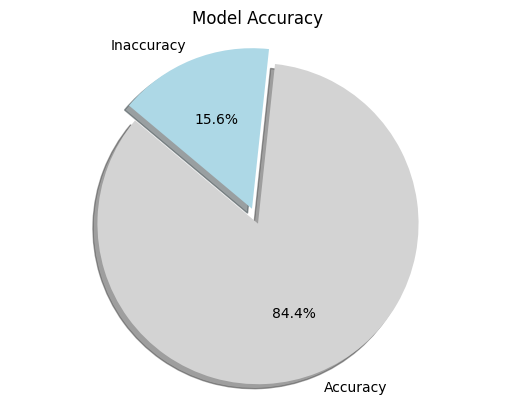

In [ ]:
import matplotlib.pyplot as plt

# Data
accuracy = 84.42
inaccuracy = 100 - accuracy

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Accuracy', 'Inaccuracy'
sizes = [accuracy, inaccuracy]
colors = ['lightgrey', 'lightblue']
explode = (0.1, 0)  # explode the 1st slice (Accuracy)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Model Accuracy')
plt.show()
